In [1]:
# modules that you are likely to use

import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

ImportError: No module named cartopy.crs

In [ ]:
# 1. Load in the dataset using `xarray.open_dataset` or `xarray.open_mfdataset`
#    We will be using the "ERA-Interim" reanalysis simulations, look in `data/ERA-Interim`
ds_ei_plevels = xr.open_mfdataset('../data/ERA-Interim/ei_model_levels.nc')
ds_ei_sfc = xr.open_mfdataset('../data/ERA-Interim/ei_surface.nc')
ds_ei = xr.merge([ds_ei_plevels, ds_ei_sfc])

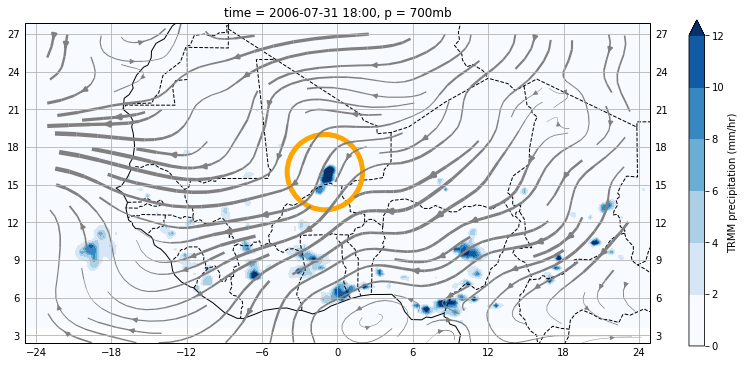

In [102]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())

t = '2006-07-31 18:00'

ds_ = ds_ei.sel(level=700, time=t, longitude=slice(-25, 25), latitude=slice(0, 28))



ds_['u_mag'] = ((ds_.u.dims), np.sqrt(ds_.u**2. + ds_.v**2.))

#ds_.vo.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
cnt = ds_trmm.sel(time=t, longitude=slice(-25, 25), latitude=slice(0, 28)).pcp.plot.contourf(
    add_colorbar=True, vmax=12., cmap='Blues'
)

cnt.colorbar.set_label("TRMM {}".format(ds_trmm.pcp.long_name))


plt.streamplot(*np.meshgrid(ds_.longitude, ds_.latitude, indexing='xy'),
               ds_.u.values, ds_.v.values, linewidth=0.3*ds_.u_mag.values, color='grey')#, label='horizontal wind')

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False

plt.title("time = {}, p = {}mb".format(t, ds_.level.values))


plot_storm_loc(str(ds_.time.values))

plt.savefig('daughter-storm.png')

#### ds_trmm.pcp.plot.contourf()